In [1]:
# Load the data from full.regular.txt
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/full.regular.txt', delim_whitespace=True)

In [2]:
data.isnull().sum()

0          0
GLN        0
C          0
0.000      0
0.000.1    0
0.000.2    0
1          0
1.1        0
1.2        0
1.3        0
1.4        0
0.1        0
dtype: int64

In [3]:
data.describe()

,0,0.000,0.000.1,0.000.2,1,1.1,1.2,1.3,1.4,0.1
count,1.079133e+06,1.079133e+06,1.079133e+06,1.079133e+06,1.079133e+06,1.079133e+06,1.079133e+06,1.079133e+06,1.079133e+06,1079133.0
mean,1.502021e+02,5.965603e+00,7.416875e+00,9.035807e+00,1.504170e-02,7.553749e-02,2.246748e-01,8.234490e-01,2.491768e+00,0.0
std,1.267608e+02,8.436803e-01,2.182458e+00,3.029510e+00,1.221747e-01,2.767069e-01,4.954270e-01,1.201071e+00,2.386876e+00,0.0
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,5.500000e+01,5.467000e+00,5.278000e+00,6.272000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.0
50%,1.180000e+02,5.795000e+00,7.869000e+00,8.905000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.0
75%,2.140000e+02,6.563000e+00,9.370000e+00,1.184800e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00,0.0
max,1.015000e+03,7.826000e+00,1.159000e+01,1.492200e+01,2.000000e+00,4.000000e+00,6.000000e+00,1.000000e+01,1.800000e+01,0.0


In [110]:
y = data.iloc[:, 2]
X = data.iloc[:, [3,4]]

In [111]:
y.value_counts()

C
H    459325
C    377953
E    241855
Name: count, dtype: int64

In [113]:
y = y
y = y.values
X = X
X = X.values


AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [114]:
#X_samll = X.iloc[0:100,0:]
#y_samll = y.iloc[0:100]

In [115]:
target_encoding = []
for x in y:
  if x == "H":
    target_encoding.append(4)
  elif x == "C":
    target_encoding.append(3)
  else:
      target_encoding.append(2)
target_encoding = np.array(target_encoding)

# ***Randome Under Sampleing***

In [116]:


from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X_under, y_under = undersample.fit_resample(X, target_encoding)

In [117]:
pd.DataFrame(y_under).value_counts()

3    377953
2    241855
4    241855
Name: count, dtype: int64

# ***Randome Over Sampleing***

In [139]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X,target_encoding)

In [140]:
pd.DataFrame(y_over).value_counts()

2    459325
4    459325
3    377953
Name: count, dtype: int64

# ***SMOTE***

In [141]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_sm, y_sm = oversample.fit_resample(X, target_encoding)

In [142]:
pd.DataFrame(y_sm).value_counts()

2    459325
3    459325
4    459325
Name: count, dtype: int64

In [143]:
X_over.shape

(1296603, 2)

In [144]:
X_sm.shape

(1377975, 2)

In [145]:
X_total =pd.concat([pd.DataFrame(X_over),pd.DataFrame(X_sm)])
X_total =pd.concat([pd.DataFrame(y_over),pd.DataFrame(y_sm)])

In [146]:
X_total.shape

(2674578, 1)

In [147]:
pd.DataFrame(Y_total).value_counts()

2    918650
4    918650
3    837278
Name: count, dtype: int64

In [148]:
np.array(Y_total).shape

(2674578, 1)

In [13]:
import tensorflow as tf
from tensorflow import keras

In [149]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[2, 1]))
model.add(keras.layers.Dense(32, activation="swish"))
model.add(keras.layers.Dense(128, activation="swish"))
model.add(keras.layers.Dense(3, activation="softmax"))

In [150]:
target_encoding = []
for x in np.array(y_over).ravel():
  if x == 2:
    target_encoding.append([1, 0, 0])
  elif x == 4:
    target_encoding.append([0, 1, 0])
  else:
      target_encoding.append([0, 0, 1])
target_encoding = np.array(target_encoding)

In [151]:
target_encoding.shape

(1296603, 3)

In [152]:
pd.DataFrame(target_encoding).value_counts()

0  1  2
0  1  0    459325
1  0  0    459325
0  0  1    377953
Name: count, dtype: int64

In [153]:
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 2)                 0         
                                                                 
 dense_9 (Dense)             (None, 32)                96        
                                                                 
 dense_10 (Dense)            (None, 128)               4224      
                                                                 
 dense_11 (Dense)            (None, 3)                 387       
                                                                 
Total params: 4707 (18.39 KB)
Trainable params: 4707 (18.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [154]:
import numpy as np
X_tensor = np.array(X_over).reshape(X_over.shape[0],X_over.shape[1],1)

In [155]:
print(X_tensor.shape)

(1296603, 2, 1)


In [156]:
target_encoding.shape

(1296603, 3)

In [65]:
weights, biases =  model.layers[1].get_weights()


In [66]:
print(weights)

[[-1.29740193e-01  4.10110831e-01  9.67704803e-02  3.34231913e-01
   1.25606313e-01  5.98502636e-01 -2.75580794e-01 -2.66934484e-01
  -7.02801123e-02 -7.97070414e-02 -2.88624853e-01 -4.80922833e-02
  -9.32495594e-01  8.86049509e-01 -3.18686962e-01 -1.05467826e-01
  -8.06228757e-01  5.59374869e-01  3.27713490e-01 -2.84050435e-01
   3.52546349e-02  4.43235831e-03 -2.12207630e-01 -4.34126258e-01
  -2.44861364e-01  1.07067084e+00 -2.10663170e-01  5.40889919e-01
   1.49690676e-02  2.39062980e-01  6.58852682e-02  1.81739762e-01]
 [-1.17467785e+00  3.60557258e-01 -1.96871355e-01  3.17333043e-01
   1.07434675e-01 -7.35420808e-02  2.52623886e-01  8.24577212e-02
   7.85287768e-02 -3.38757455e-01  1.81705892e-01  1.23960495e-01
  -4.40563351e-01  1.99241951e-01 -6.16568848e-02 -2.82566369e-01
   9.02906597e-01 -8.41691643e-02  1.99320525e-01  2.84544349e-01
  -2.46877223e-01  1.70793355e-01  6.87237680e-02 -3.02778542e-01
   2.94749826e-01 -7.73931205e-01 -1.34890288e-01 -5.18147826e-01
   1.7660

In [67]:
weights.shape

(8, 32)

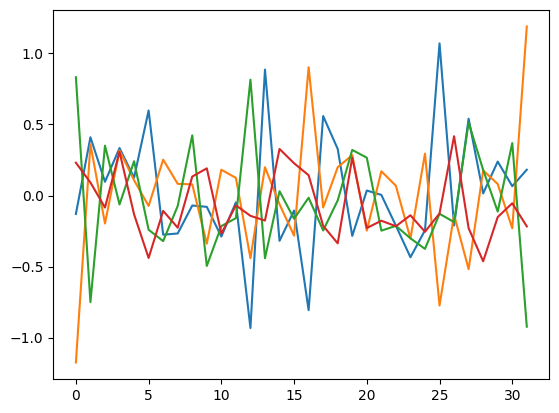

In [68]:
import matplotlib.pyplot as plt
plt.plot(weights[0])
plt.plot(weights[1])
plt.plot(weights[2])
plt.plot(weights[3])

In [157]:
model.compile(loss="categorical_crossentropy",
 optimizer="sgd",
 metrics=["accuracy"])

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X_tensor, target_encoding, test_size=0.30, random_state=0)
print(y_train.shape)
print(y_test.shape)
print(X_train.shape)
print(X_test.shape)

(907622, 3)
(388981, 3)
(907622, 2, 1)
(388981, 2, 1)


In [160]:
history = model.fit(X_train, y_train, epochs=1000,validation_data=(X_test, y_test),batch_size = 8192,validation_batch_size=8192)

Epoch 1/200
111/111 [==============================] - 1s 11ms/step - loss: 0.6554 - accuracy: 0.7129 - val_loss: 0.6541 - val_accuracy: 0.7134
Epoch 2/200
111/111 [==============================] - 2s 20ms/step - loss: 0.6547 - accuracy: 0.7134 - val_loss: 0.6539 - val_accuracy: 0.7152
Epoch 3/200
111/111 [==============================] - 2s 23ms/step - loss: 0.6549 - accuracy: 0.7130 - val_loss: 0.6535 - val_accuracy: 0.7133
Epoch 4/200
111/111 [==============================] - 2s 14ms/step - loss: 0.6549 - accuracy: 0.7131 - val_loss: 0.6611 - val_accuracy: 0.7137
Epoch 5/200
111/111 [==============================] - 2s 16ms/step - loss: 0.6564 - accuracy: 0.7177 - val_loss: 0.6729 - val_accuracy: 0.7005
Epoch 6/200
111/111 [==============================] - 1s 10ms/step - loss: 0.6534 - accuracy: 0.7193 - val_loss: 0.6528 - val_accuracy: 0.7187
Epoch 7/200
111/111 [==============================] - 1s 10ms/step - loss: 0.6549 - accuracy: 0.7183 - val_loss: 0.6572 - val_accuracy:

KeyboardInterrupt: 